In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/FINAL_PROJECT/dataset.csv'

Mounted at /content/drive


#PROJECT FLOW:
####AFTER RUNNING DIFFERENT MODELS ON RAW DATASETS WE INFERRED THAT :
#### WE HAVE IMBALANCED DATASET HENCE WE WILL USE DIFFERENT TECHNIQUES TO HANDLE THE SAME
###The models performed better for the majority class (class 0) but struggles with the minority class (class 1). The lower recall for class 1 indicates that the model does not identify many of the actual class 1 cases.



####Handling Imbalance:
1)Resampling: Either oversample the minority class or undersample the majority class to balance the dataset.

2)Synthetic Data Generation: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.

Trying Hybrid Methods:
1)SMOTE-Tomek Links: Combines SMOTE for oversampling and Tomek Links for cleaning the majority class.
2)SMOTE-ENN: Uses SMOTE to generate synthetic samples and ENN for cleaning.

### To improve performances of several models we used PCA,HyperParameter Tunning and Cross Validation
###Evaluation is done on the basis of accuracy score,ROC/AUC Score


#Feature Engineering:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv(file_path)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [ ]:
#dropping duplicates
data.drop_duplicates(inplace=True)

# Find columns with only one unique value
unique=data.nunique()
same_value=unique[unique==1].index.to_list()
print(same_value)
#dropping these columns
data=data.drop(same_value,axis=1)
#dropping marital status,Employee Number-unnecessary
data=data.drop(["MaritalStatus","EmployeeNumber"],axis=1)


['EmployeeCount', 'Over18', 'StandardHours']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

#DATA ANALYSIS AND VISUALIZATIONS

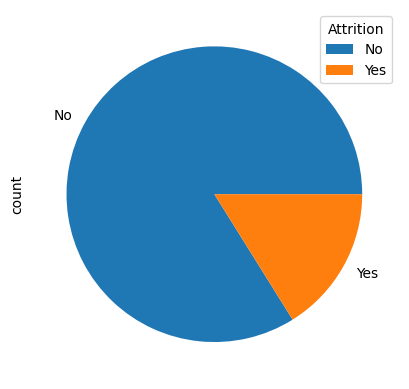

In [ ]:
#Visualizing the target variable
data['Attrition'].value_counts().plot.pie()
plt.legend(title='Attrition')
plt.show()

Case of negatives make up majority of the Attrition data. It implies a CLASS IMBALANCE.

In [ ]:
#Using chi-square statistical test to identify the relevence of categorical features with respect to the target variable
#P-values: Smaller values indicate stronger evidence against the null hypothesis that the feature has no effect.
from scipy.stats import chi2_contingency
cat_features=data.select_dtypes(include=["object"]).columns.tolist()
cat_features.remove('Attrition')
threshold=0.05
signi_cat_features=[]
for feature in cat_features:
  contingency_table=pd.crosstab(data[feature],data['Attrition'])
  chi2, p_val, dof, ex=chi2_contingency(contingency_table)
  print(f"Feature: {feature}")
  print(f"p_val: {p_val}")
  print(f"degree_of_freedom: {dof}")
  print(f"Expected frequency: {ex}")
  if p_val<0.05:
    print(f"{feature} is of significance.")
    signi_cat_features.append(feature)
  else:
    print(f"{feature} is not significant.")
  print()

Feature: BusinessTravel
p_val: 5.608614476449931e-06
degree_of_freedom: 2
Expected frequency: [[125.81632653  24.18367347]
 [232.34081633  44.65918367]
 [874.84285714 168.15714286]]
BusinessTravel is of significance.

Feature: Department
p_val: 0.004525606574479633
degree_of_freedom: 2
Expected frequency: [[ 52.84285714  10.15714286]
 [806.06326531 154.93673469]
 [374.09387755  71.90612245]]
Department is of significance.

Feature: EducationField
p_val: 0.006773980139025212
degree_of_freedom: 5
Expected frequency: [[ 22.64693878   4.35306122]
 [508.29795918  97.70204082]
 [133.36530612  25.63469388]
 [389.19183673  74.80816327]
 [ 68.77959184  13.22040816]
 [110.71836735  21.28163265]]
EducationField is of significance.

Feature: Gender
p_val: 0.29057244902890855
degree_of_freedom: 1
Expected frequency: [[493.2  94.8]
 [739.8 142.2]]
Gender is not significant.

Feature: JobRole
p_val: 2.752481638050657e-15
degree_of_freedom: 8
Expected frequency: [[109.87959184  21.12040816]
 [ 43.6163

In [ ]:
#dropping Gender-In Accordance with chi-square test
data=data.drop("Gender",axis=1)

In [ ]:
#Converting Attrition columns to int type
data['Attrition']=data['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

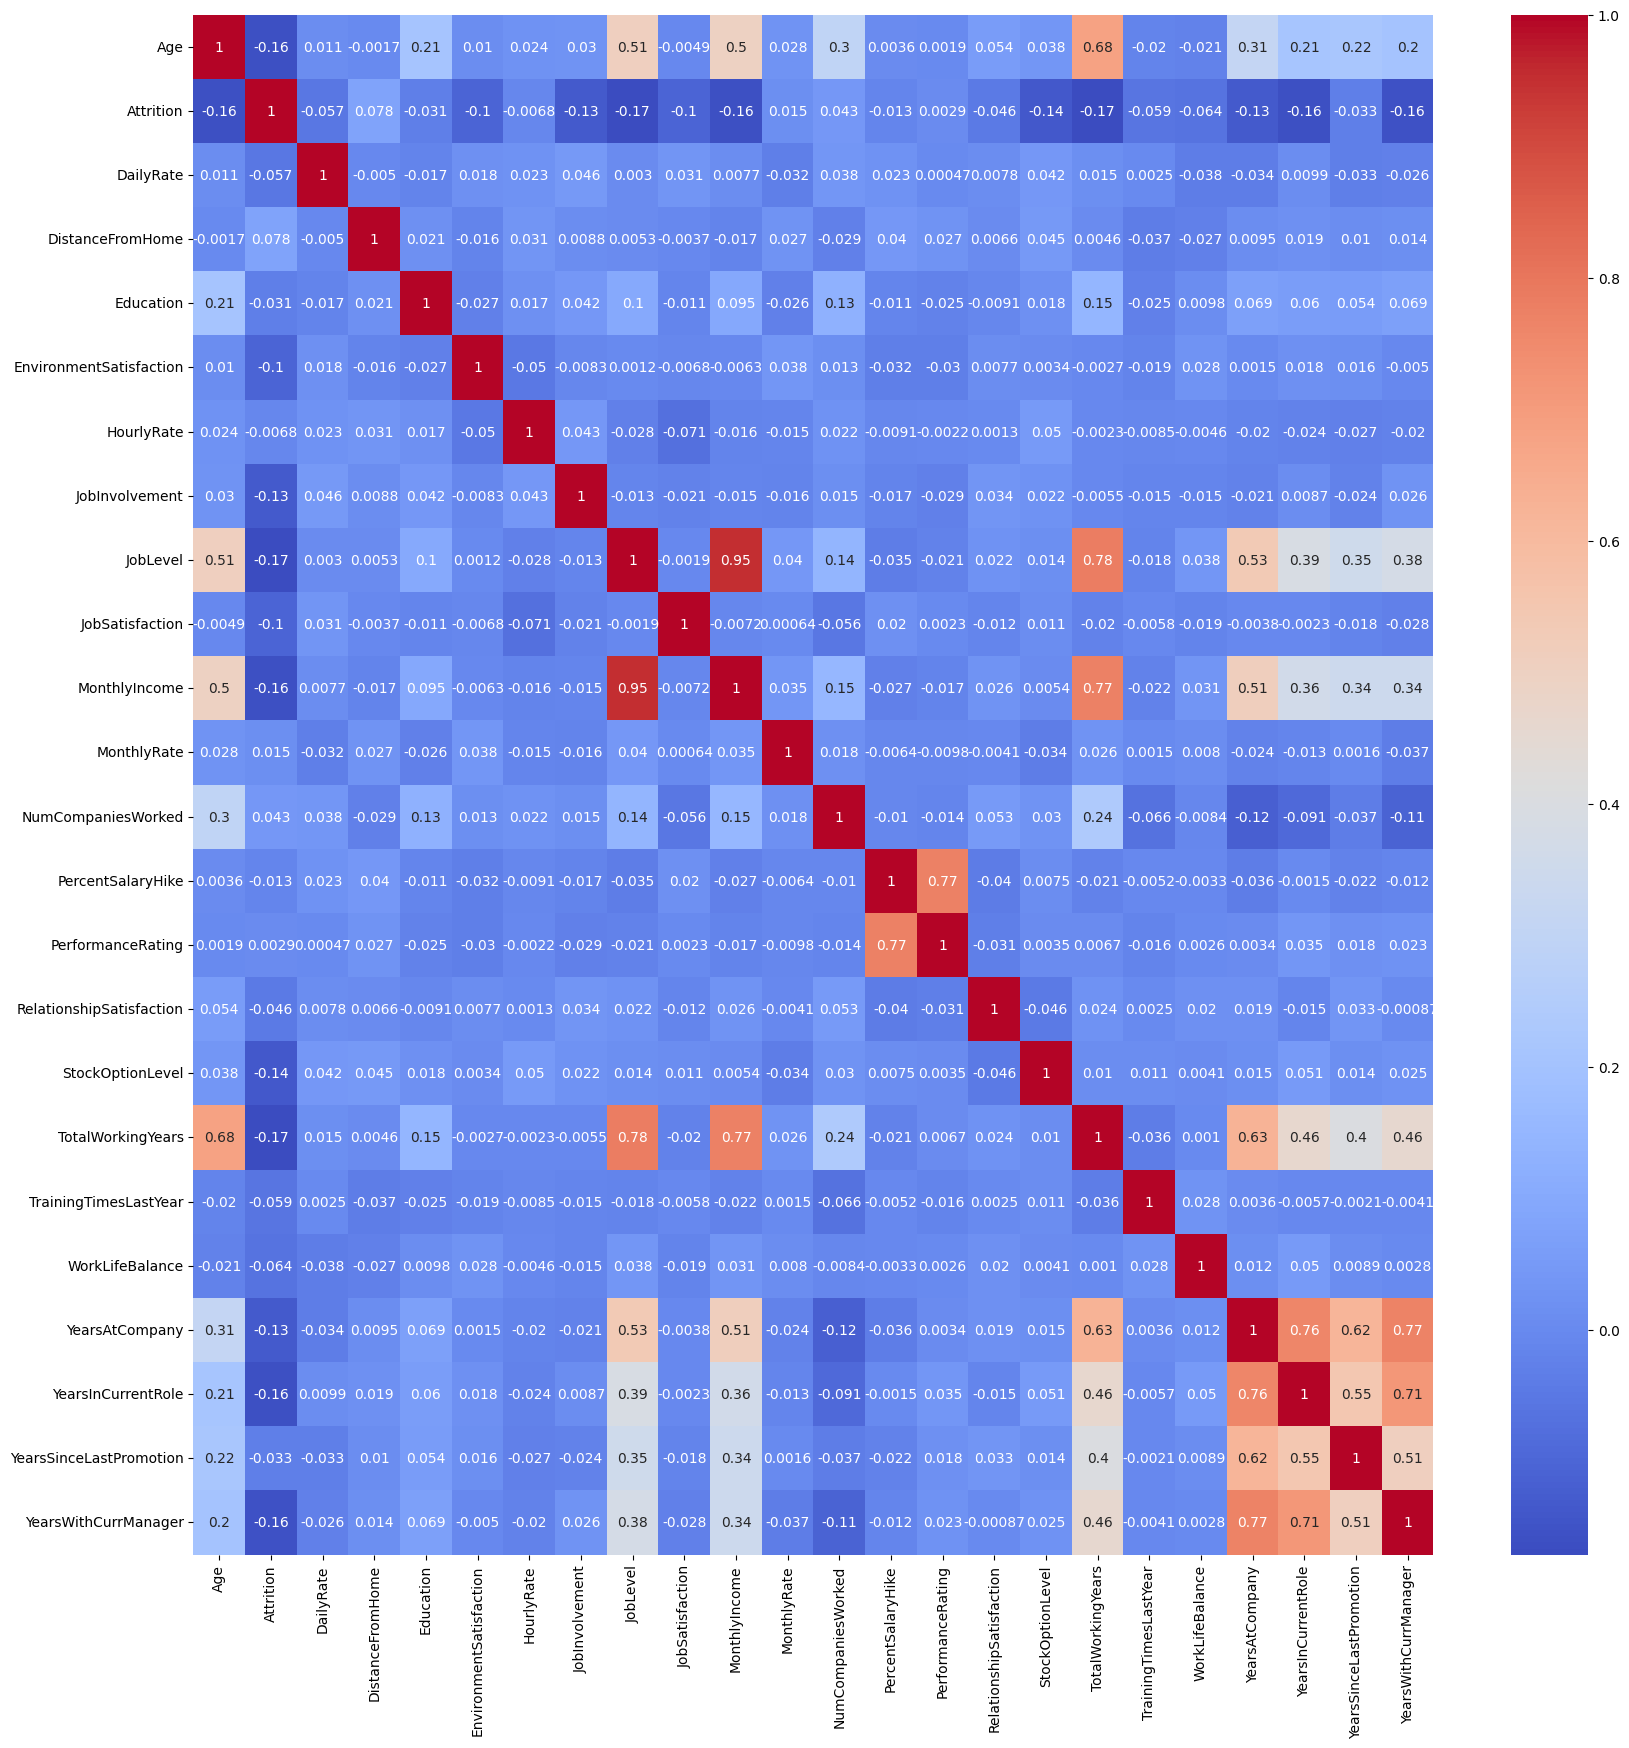

In [ ]:
#Heatmap for understanding correlation between all the numerical features
fig=plt.figure(figsize=(20,20))
num_features=data.select_dtypes(include=["int"])
correlation_matrix=num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

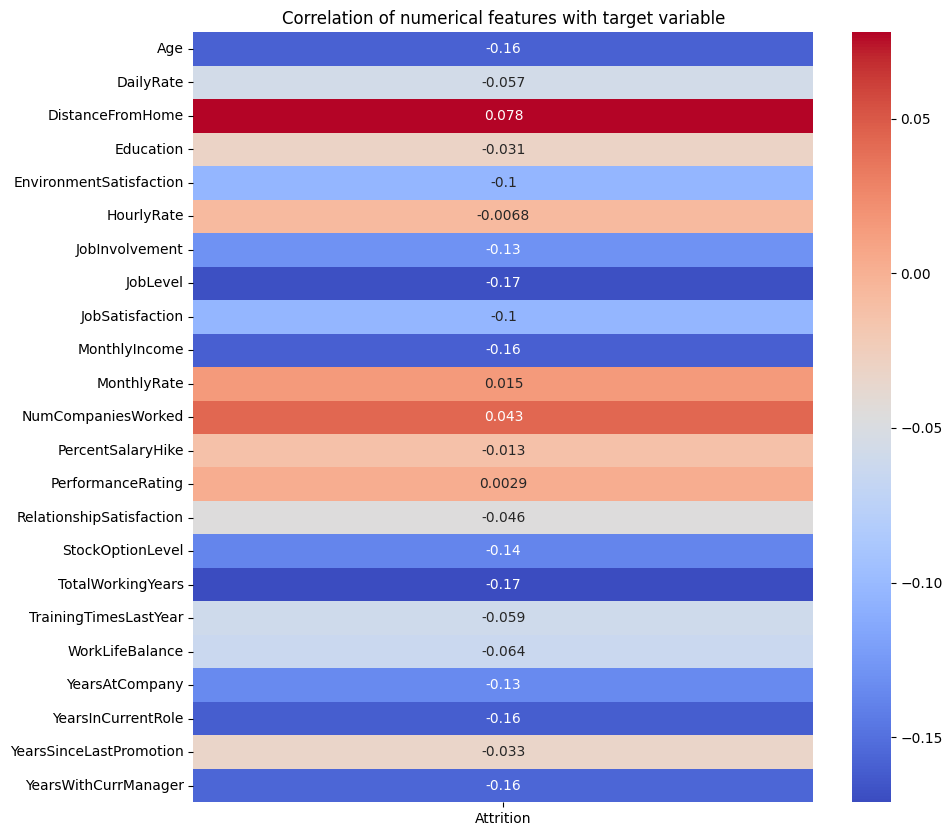

In [ ]:
#Correlation of numerical features with target variable
#This heatmap is used for feature selection phase of model building
target_corr=correlation_matrix['Attrition'].drop('Attrition')
plt.figure(figsize=(10,10))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation of numerical features with target variable")
plt.show()

In [ ]:
#USING CORRELATIONS FOR FEATURE REDUCTION
'''Features with Low Correlation with Attrition:
PerformanceRating (0.0029)
HourlyRate (-0.0068)
PercentSalaryHike (-0.013)
-----------------'''
'''Removing Redundant Features-
JobLevel and MonthlyIncome have high correlation(0.95), keeping both might not provide additional and can lead to overfitting. '''

#Dropping the mentioned columns
#data=data.drop(["PerformanceRating","HourlyRate","PercentSalaryHike","JobLevel"],axis=1)
data=data.drop(["PerformanceRating","HourlyRate"],axis=1)

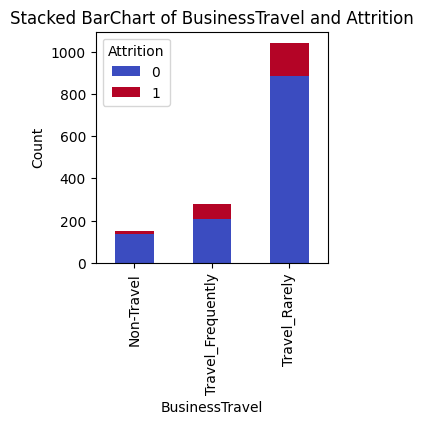

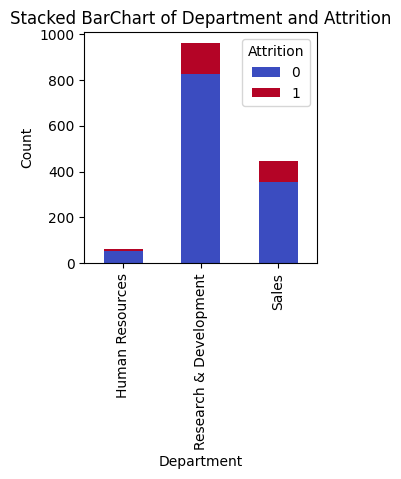

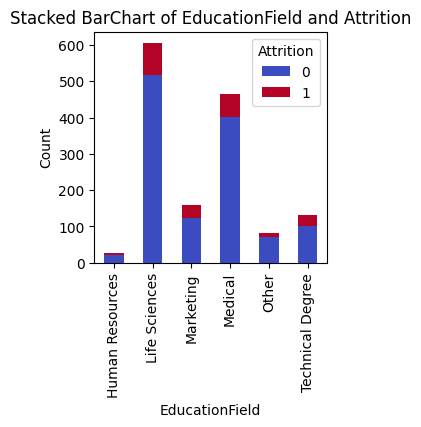

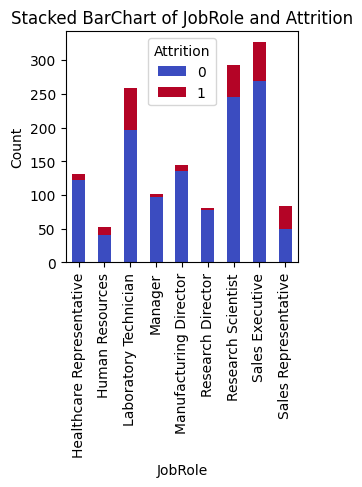

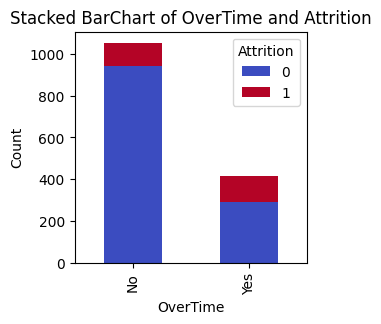

In [ ]:
#Stacked bar charts- for visualizing the relationship between the categorical features and target variable
def plot_stacked_bar(feature):
  crosstab=pd.crosstab(data[feature], data['Attrition'])
  crosstab.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(3,3))
  plt.title(f"Stacked BarChart of {feature} and Attrition")
  plt.xlabel(f"{feature}")
  plt.ylabel("Count")

for feature in signi_cat_features:
  plot_stacked_bar(feature)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MonthlyIncome             1470 non-null   int64 
 14  MonthlyRate             

In [ ]:
#separating categorical data from the data for furthur processing
def separate(data):
  cat_data_columns=data.select_dtypes(include=["object"]).columns
  cat_data=data[cat_data_columns]
  return cat_data
cat_data=separate(data)
data=data.drop(cat_data.columns,axis=1)
print(cat_data.head())
#BusinessTravel,JobRole, OverTime,Department,EducationField REQUIRES ENCODING


      BusinessTravel              Department EducationField  \
0      Travel_Rarely                   Sales  Life Sciences   
1  Travel_Frequently  Research & Development  Life Sciences   
2      Travel_Rarely  Research & Development          Other   
3  Travel_Frequently  Research & Development  Life Sciences   
4      Travel_Rarely  Research & Development        Medical   

                 JobRole OverTime  
0        Sales Executive      Yes  
1     Research Scientist       No  
2  Laboratory Technician      Yes  
3     Research Scientist      Yes  
4  Laboratory Technician       No  


In [ ]:
#IDENTIFYING columns which require binary classification in cat_data
for col in cat_data.columns:
  print(cat_data[col].value_counts())
  print()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

OverTime
No     1054
Yes     416
Name: count, dtype: int64



In [ ]:
#overtime-binary classification
cat_data["OverTime"]=cat_data["OverTime"].apply(lambda x:0 if x=="No" else 1)
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
#JobRole, EducationField,Department,BusinessTravel require encoding
for column in ["JobRole", "EducationField","Department","BusinessTravel"]:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
cat_data.head()

<ipython-input-18-c128569ecc09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data["OverTime"]=cat_data["OverTime"].apply(lambda x:0 if x=="No" else 1)


,BusinessTravel,Department,EducationField,JobRole,OverTime
0,2,2,1,7,1
1,1,1,1,6,0
2,2,1,4,2,1
3,1,1,1,6,1
4,2,1,3,2,0


In [ ]:
#EXTRACTING THE DEPENDENT VARIABLE(Attrition)
y=data["Attrition"]
data.drop("Attrition",axis=1,inplace=True)
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [ ]:
print(X.shape)

NameError: name 'X' is not defined

In [ ]:
# MERIGING cat_data ,cat_data_dummies to the original dataset-to get our matrix of features
X=pd.concat([data,cat_data],axis=1)
X.head()